# Coronavirus (Covid-19) Growth in 2019/2020
### Understanding coronavirus growth, distribution in US and by states

### Introduction
The Covid-19 is a contagious coronavirus that hailed from Wuhan, China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. How coronavirus have grow in 2019/2020 and what is his cases distribution in China and other countries are questions to be answered by this kernel.

### Data Source
https://github.com/CSSEGISandData/COVID-19

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

conf = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
dea = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

confirmed = pd.read_csv(conf)
deaths = pd.read_csv(dea)

confirmed = np.sum(confirmed.iloc[:,11:confirmed.shape[1]])
deaths = np.sum(deaths.iloc[:,11:deaths.shape[1]])
confirmed

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
5/5/20     1204351
5/6/20     1229331
5/7/20     1257023
5/8/20     1283929
5/9/20     1309550
Length: 109, dtype: int64

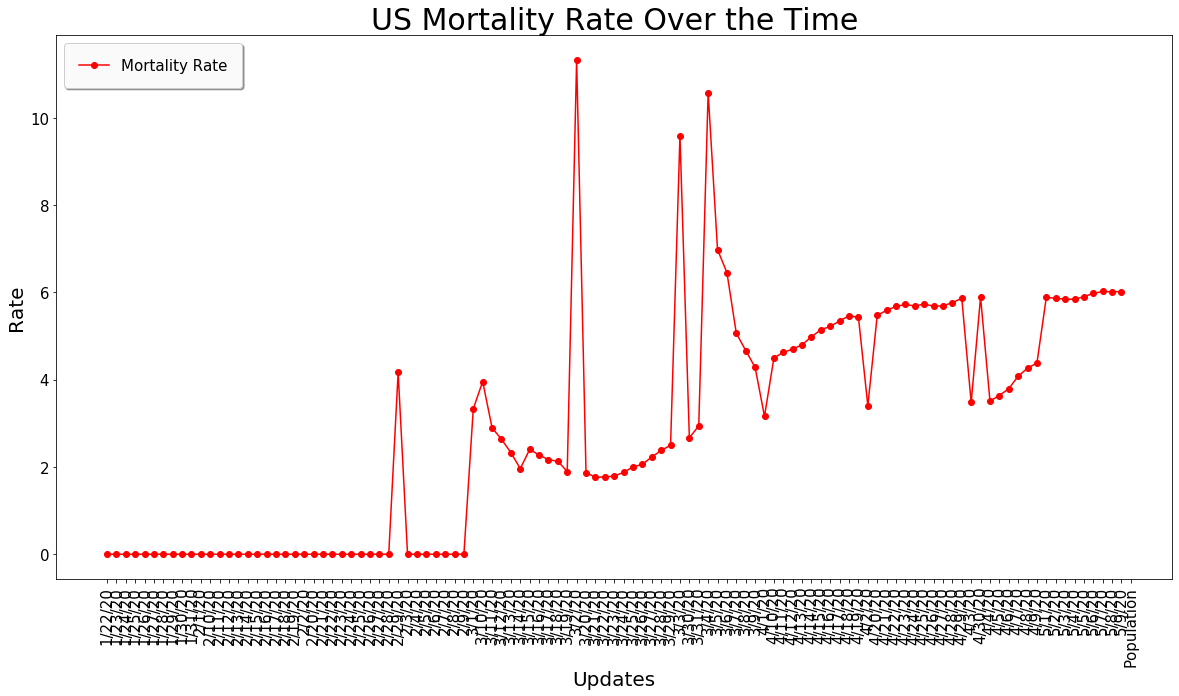

In [50]:
global_mortality = (deaths/confirmed)*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(global_mortality
        , color = 'red'
        , label = 'Mortality Rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('US Mortality Rate Over the Time',size=30)
plt.ylabel('Rate',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

### Loading Required Libraries and Datasets

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
confirmed = pd.read_csv(conf)
deaths = pd.read_csv(dea)

### Dealing with missing values

In [54]:
# replacing missings
confirmed = confirmed.fillna('unknow')
deaths = deaths.fillna('unknow')

In [55]:
# defyning the last update
last_update = '5/9/20'

In [ ]:
#  taking total confirmed, recovered and deaths from last_update and joing
country = 'US'
confir = confirmed[['Province_State',last_update]][confirmed['Country_Region']==country][last_update]
deat = deaths[last_update][deaths['Country_Region']==country]

country_cases = confirmed[['Province_State',last_update]][confirmed['Country_Region']==country]
country_cases['deaths'] = deat

# setting "Province/State" as index
country_cases = country_cases.set_index('Province_State')

# renaming columns
country_cases = country_cases.rename(columns = {last_update:'confirmed'
                                            ,'deaths':'deaths'})

country_cases

In [ ]:
# creating the plot
country_cases.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                            , figsize=(20,30)
                                                            , color = ['#4b8bbe','lime','orange','red']
                                                            , width=1
                                                            , rot=2)

# defyning legend and titles parameters
plt.title('Total cases in US', size=40)
plt.ylabel('States',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Hubei Cases Distribution
Clearly Hubei have the higher case numbers, if we take a more detailed look into Hubei data with a pie chart we can see the same distribution above but with more detalies, 0.0% of the cases still with coronavirus and don't recovered yet, 6.2% of infected people had died and 93.7% has recovered.

In [ ]:
# taking cases numbers
Hubei = china_cases[china_cases.index=="Hubei"]
Hubei = Hubei.iloc[0]
Hubei = Hubei.iloc[1:4]

# difyning plot size
plt.figure(figsize=(15,15))

# here i use .value_counts() to count the frequency that each category occurs of dataset
Hubei.plot(kind='pie'
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# defyning titles and legend parameters
plt.title('Hubei Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Cases Growth in China

The cases are controlled in China since 2/18/20 with confirmed cases stop growing exponentially and non_recovered falling fast, let's take a look in cases growth over the days.

In [ ]:
# creating a subset with confirmed cases in China
confirmed_china = confirmed[confirmed['Country/Region']=='China']
confirmed_china = confirmed_china.groupby(confirmed_china['Country/Region']).sum()

# taking confirmed cases growth over the time
confirmed_china = confirmed_china.iloc[0][2:confirmed_china.shape[1]]

Confirmed cases stop growing exponentially around 2/14/20 and have been under control ever since, was more then 80000 confirmed cases in China until now.

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
plt.plot(confirmed_china
        , color = '#4b8bbe'
        , label = 'comfirmed'
        , marker = 'o')

# titles parameters
plt.title('Confirmed cases over the time in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# creating a subset with recoreved cases in China
recovered_china = recovered[recovered['Country/Region']=='China']
recovered_china = recovered_china.groupby(recovered_china['Country/Region']).sum()

# taking recovered cases growth over the time
recovered_china = recovered_china.iloc[0][2:recovered_china.shape[1]]

# creating a subset with death cases in China
deaths_china = deaths[deaths['Country/Region']=='China']
deaths_china = deaths_china.groupby(deaths_china['Country/Region']).sum()

# taking death cases growth over the time
deaths_china = deaths_china.iloc[0][2:deaths_china.shape[1]]

non_recovered_china = confirmed_china-recovered_china-deaths_china

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(recovered_china
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Recovered over the time in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

Here we can see the exactly point where China control the Corona growth, Non recovered cases are falling since 2/16/20 , in the moment, China still have around 10000 unrecovered cases

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(non_recovered_china
        , color = 'orange'
        , label = 'non_recovered'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Non_Recovered over the time in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(deaths_china
        , color = 'red'
        , label = 'death'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Deaths over the time in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Mortality,Non_Recovered and Recovered Rates in % in China

Here i'm using a simple approach for mortality, non_recovered and recovered rates, just recovered/total_cases, let's see the Mortality, non_recovered and Recovered rates in China.

In [ ]:
# taking mortality and recovered ratios in China
recovered_rate = (recovered_china/(confirmed_china))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(recovered_rate
        , color = 'lime'
        , label = 'recovered rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Recovered Rate Over the time In China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# taking mortality and recovered ratios in China
non_recovered_rate = (non_recovered_china/(confirmed_china))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(non_recovered_rate
        , color = 'Orange'
        , label = 'Non recovered rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Non recovered Rate Over the time In China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# taking mortality and recovered ratios in China
mortality_rate = (deaths_china/(confirmed_china))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(mortality_rate
        , color = 'red'
        , label = 'mortality rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Mortality Rate Over the time In China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Cases Growth outside of China

In contrast to China, in other countries, confirmed cases only exploded around 3/5/20, while China controlled the growth of the virus, worldwide the virus was spreading strongly.

In [ ]:
# selecting cases by country that are not located in Mainland China
other_countries_confirmed = confirmed[confirmed.columns[4:confirmed.shape[1]]][confirmed['Country/Region']!='China']
other_countries_confirmed = other_countries_confirmed.iloc[0:other_countries_confirmed.shape[0]].sum()

other_countries_recovered = recovered[recovered.columns[4:recovered.shape[1]]][recovered['Country/Region']!='China']
other_countries_recovered = other_countries_recovered.iloc[0:other_countries_recovered.shape[0]].sum()

other_countries_deaths = deaths[deaths.columns[4:deaths.shape[1]]][deaths['Country/Region']!='China']
other_countries_deaths = other_countries_deaths.iloc[0:other_countries_deaths.shape[0]].sum()

other_countries_non_recovered = other_countries_confirmed-other_countries_recovered-other_countries_deaths

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(other_countries_confirmed
        , color = '#4b8bbe'
        , label = 'confirmed'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Confirmed over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(other_countries_recovered
        , color = 'lime'
        , label = 'recovered'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Recovered over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(other_countries_non_recovered
        , color = 'Orange'
        , label = 'Non recovered'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Non recovered over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(other_countries_deaths
        , color = 'red'
        , label = 'deaths'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Deaths over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Mortality,Non_Recovered and Recovered Rates in % outside of China

Here i'm using a simple approach for mortality, non_recovered and recovered rates, just recovered/total_cases, let's see the Mortality, non_recovered and Recovered rates Outside of China.

In [ ]:
recovered_rate_other_countries = (other_countries_recovered/(other_countries_confirmed))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(recovered_rate_other_countries
        , color = 'lime'
        , label = 'recovered rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Recovered Rate Over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
non_recovered_rate_other_countries = (other_countries_non_recovered/(other_countries_confirmed))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(non_recovered_rate_other_countries
        , color = 'Orange'
        , label = 'Non recovered rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Non recovered Rate Over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [ ]:
death_rate_other_countries = (other_countries_deaths/(other_countries_confirmed))*100

# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot
plt.plot(death_rate_other_countries
        , color = 'red'
        , label = 'mortality rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Mortality Rate Over the time outside of China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Total cases in around the world by country except China

We already see the virus distribution and growth in China, but in other coutries? How coronavirus are growing and distributed?

To answer this question let's take all cases that are not in China and then take the sum of confirmed, recovered and death cases by country

In [ ]:
# selecting cases that are not in China and join

confir = confirmed[['Country/Region','Province/State',last_update]][confirmed['Country/Region']!='China'][last_update]
recover = recovered[last_update][recovered['Country/Region']!='China']
deat = deaths[last_update][deaths['Country/Region']!='China']

other_countries = confirmed[['Country/Region','Province/State',last_update]][confirmed['Country/Region']!='China']
other_countries['recovered'] = recover
other_countries['non_recovered'] = confir-recover-deat
other_countries['deaths'] = deat

# sum the cases by country/region
other_countries = other_countries.groupby(other_countries['Country/Region']).sum()

# renaming the columns
other_countries = other_countries.rename(columns = {last_update:'confirmed'
                                                    ,'recovered':'recovered'
                                                    ,'non_recovered':'non_recovered'
                                                    ,'deaths':'deaths'})

other_countries['non_recovered'][other_countries['non_recovered']<0] = 0

In [ ]:
# creating the plot
other_countries.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                                , figsize=(20,50)
                                                                , color = ['#4b8bbe','lime','orange','red']
                                                                , width=1
                                                                , rot=2)

# defyning titles, labels, xticks and legend parameters
plt.title('Total cases by country', size=40)
plt.ylabel('country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Biggest countries in confirmed cases number

In last 15 days we have a GREAT explosion of confirmed cases around the wolrd, let's take a look into the top 10 countries: US, Italy, Spain, Germany, France, Iran, United Kingdom, Switzerland, Netherlands and South Korea

In [ ]:
top_10_confirmed = confirmed[(confirmed['Country/Region']=='US') | 
                             (confirmed['Country/Region']=='Spain') |
                             (confirmed['Country/Region']=='Italy') |
                             (confirmed['Country/Region']=='France') |
                             (confirmed['Country/Region']=='Germany') |
                             (confirmed['Country/Region']=='United Kingdom') |
                             (confirmed['Country/Region']=='Turkey') |
                             (confirmed['Country/Region']=='Iran') |
                             (confirmed['Country/Region']=='Russia') |
                             (confirmed['Country/Region']=='Brazil')]

top_10_confirmed = top_10_confirmed.groupby(top_10_confirmed['Country/Region']).sum()

top_10_confirmed = top_10_confirmed.drop(['Lat','Long'], axis = 1)
top_10_confirmed = top_10_confirmed.transpose()

In [ ]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot

US = top_10_confirmed['US'][top_10_confirmed['US']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(US)
        , color = 'red'
        , label = 'US'
        , marker = 'o')

Spain = top_10_confirmed['Spain'][top_10_confirmed['Spain']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Spain)
        , color = 'green'
        , label = 'Spain'
        , marker = 'o')

Italy = top_10_confirmed['Italy'][top_10_confirmed['Italy']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Italy)
        , color = 'cyan'
        , label = 'Italy'
        , marker = 'o')

France = top_10_confirmed['France'][top_10_confirmed['France']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(France)
        , color = 'black'
        , label = 'France'
        , marker = 'o')

Germany = top_10_confirmed['Germany'][top_10_confirmed['Germany']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Germany)
        , color = 'blue'
        , label = 'Germany'
        , marker = 'o')

UK = top_10_confirmed['United Kingdom'][top_10_confirmed['United Kingdom']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(UK)
        , color = 'darkred'
        , label = 'United Kingdom'
        , marker = 'o')

Turkey = top_10_confirmed['Turkey'][top_10_confirmed['Turkey']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Turkey)
        , color = 'darkblue'
        , label = 'Turkey'
        , marker = 'o')

Iran = top_10_confirmed['Iran'][top_10_confirmed['Iran']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Iran)
        , color = 'pink'
        , label = 'Iran'
        , marker = 'o')

Russia = top_10_confirmed['Russia'][top_10_confirmed['Russia']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Russia)
        , color = 'orange'
        , label = 'Russia'
        , marker = 'o')

Brazil = top_10_confirmed['Brazil'][top_10_confirmed['Brazil']>0].reset_index().drop('index',axis=1)

plt.plot(np.log(Brazil)
        , color = 'magenta'
        , label = 'Brazil'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Top 10 countries in log confirmed cases since first case appear',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

### How the cases are distributed in this countries?

US are leading in number of cases but still with almost all cases active, italy are the second in number of cases after China (that already controled the pandemic) and in this moment still with more then 80% of cases active and more then 10% of deaths.

In [ ]:
# taking cases in Italy
Italy = other_countries[other_countries.index=="Italy"]
Italy = Italy.iloc[0]
Italy = Italy.iloc[1:4]

# taking cases in Iran
Iran = other_countries[other_countries.index=="Iran"]
Iran = Iran.iloc[0]
Iran = Iran.iloc[1:4]

# taking cases in South Korea
United_kingdom = other_countries[other_countries.index=="United Kingdom"]
United_kingdom = United_kingdom.iloc[0]
United_kingdom = United_kingdom.iloc[1:4]

# taking cases in Spain
Spain = other_countries[other_countries.index=="Spain"]
Spain = Spain.iloc[0]
Spain = Spain.iloc[1:4]

# taking cases in Germany
Germany = other_countries[other_countries.index=="Germany"]
Germany = Germany.iloc[0]
Germany = Germany.iloc[1:4]

# taking cases in US
US = other_countries[other_countries.index=="US"]
US = US.iloc[0]
US = US.iloc[1:4]

# taking cases in France
France = other_countries[other_countries.index=="France"]
France = France.iloc[0]
France = France.iloc[1:4]

# taking cases in Switzerland
Switzerland = other_countries[other_countries.index=="Switzerland"]
Switzerland = Switzerland.iloc[0]
Switzerland = Switzerland.iloc[1:4]

Italy situation are the most worrisome, more than 84% of cases was not cured yet and the deaths are 10.8%

In [ ]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4 = axes.flatten()

 # here i use .value_counts() to count the frequency that each category occurs of dataset
ax1.pie(US
        , colors=['lime','orange','red']
        , autopct='%1.1f%%' # adding percentagens
        , labels=['recovered','non_recovered','deaths']
        , shadow=True
        , startangle=140)
ax1.set_title("US Cases Distribution")

ax2.pie(Italy
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Italy Cases Distribution")

ax3.pie(Spain
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax3.set_title("Spain Cases Distribution")

ax4.pie(Germany
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Germany Cases Distribution")

fig.legend(['recovered','non_recovered','deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show();

In [ ]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=2,
                     figsize=(15, 15))

ax1, ax2, ax3, ax4 = axes.flatten()

 # here i use .value_counts() to count the frequency that each category occurs of dataset
ax1.pie(France
        , colors=['lime','orange','red']
        , autopct='%1.1f%%' # adding percentagens
        , labels=['recovered','non_recovered','deaths']
        , shadow=True
        , startangle=140)
ax1.set_title("France Cases Distribution")

ax2.pie(Iran
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax2.set_title("Iran Cases Distribution")

ax3.pie(United_kingdom
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax3.set_title("United Kingdom Cases Distribution")

ax4.pie(Switzerland
           , colors=['lime','orange','red']
           , autopct='%1.1f%%' # adding percentagens
           , labels=['recovered','non_recovered','deaths']
           , shadow=True
           , startangle=140)
ax4.set_title("Switzerland Cases Distribution")

fig.legend(['recovered','non_recovered','deaths']
           , loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)

plt.show();

#### Growth of cases over the days in other countries

The virus begins to appear in other countries on 1/26/20 and is spreading rapidly over the days. Confirmed cases are growing exponentially, fortunately the number of recovereds are growing more fast than deaths.

The pandemic situation around the world still worrisome,more than 60% of cases outside of China still not recovered and deaths are growing fast.

In [ ]:
# creating a list with confirmed, recovered and deaths cases
list_of_tuples = list(zip(other_countries_confirmed, other_countries_recovered,other_countries_non_recovered, other_countries_deaths)) 

# creating a dataframe with this list to plot the chart
other_countries_cases_growth = pd.DataFrame(list_of_tuples, index = other_countries_confirmed.index, columns = ['confirmed', 'recovered','non_recovered','deaths'])

In [ ]:
# creating the plot
other_countries_cases_growth.plot(kind='bar'
                                  , figsize=(20,10)
                                  , width=1
                                  , color=['#4b8bbe','lime','orange','red']
                                  , rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in outside of China', size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Current Total cases around the world

In [ ]:
current_cases = confirmed
current_cases = current_cases[['Country/Region',last_update]]
current_cases = current_cases.groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)
current_cases['recovered'] = recovered[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)
current_cases['deaths'] = deaths[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)
current_cases['non_recovered'] = current_cases[last_update]-current_cases['recovered']-current_cases['deaths']
current_cases = current_cases.rename(columns={last_update:'confirmed'
                                              ,'recovered':'recovered'
                                              ,'deaths':'deaths'
                                              ,'non_recovered':'non_recovered'})

current_cases.style.background_gradient(cmap='Reds')

#### ***Thank you very much for read this kernel, if you think that this kernel was useful please give a upvote, i really appriciate that :)***

***Thank you very much to @wjholst for information about how to calculate non recovered cases and subsets***

## to be continued...